# RPI Library tests

## Show numpy configuration

In [1]:
import numpy as np
# np.show_config()

## Matrix Multiplication Benchmark

In [2]:
import numpy as np
from time import time

np.random.seed(0)
size = 1024
A, B = np.random.random((size, size)), np.random.random((size, size))

# Matrix multiplication
N = 10
t = time()
for i in range(N):
    np.dot(A, B)
delta = time() - t
print('Dotted two %dx%d matrices in %0.2f s.' % (size, size, delta / N))
del A, B

Dotted two 1024x1024 matrices in 0.31 s.


## Matplotlib Demonstration

Text(0.5, 1.0, 'sin function')

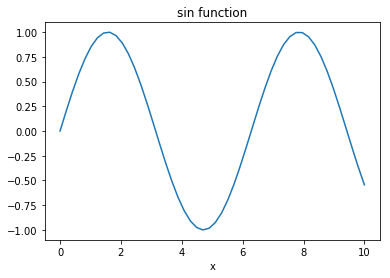

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10)

fig, ax = plt.subplots(1, 1)
ax.plot(x, np.sin(x))
ax.set_xlabel('x')
ax.set_title('sin function')

## Scipy Demonstration

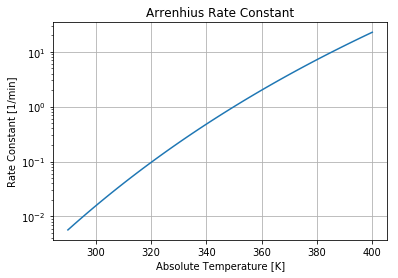

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Arrehnius parameters
Ea = 72750     # activation energy J/gmol
R = 8.314      # gas constant J/gmol/K
k0 = 7.2e10    # Arrhenius rate constant 1/min

# Arrhenius rate expression
def k(T):
    return k0*np.exp(-Ea/(R*T))

# semilog plot of the rate constant
T = np.linspace(290,400)
plt.semilogy(T, k(T))
plt.xlabel('Absolute Temperature [K]')
plt.ylabel('Rate Constant [1/min]')
plt.title('Arrenhius Rate Constant')
plt.grid();

In [2]:
from scipy.integrate import solve_ivp

Ea  = 72750     # activation energy J/gmol
R   = 8.314     # gas constant J/gmol/K
k0  = 7.2e10    # Arrhenius rate constant 1/min
V   = 100.0     # Volume [L]
rho = 1000.0    # Density [g/L]
Cp  = 0.239     # Heat capacity [J/g/K]
dHr = -5.0e4    # Enthalpy of reaction [J/mol]
UA  = 5.0e4     # Heat transfer [J/min/K]
q   = 100.0     # Flowrate [L/min]
cAi = 1.0       # Inlet feed concentration [mol/L]
Ti  = 350.0     # Inlet feed temperature [K]
cA0 = 0.5;      # Initial concentration [mol/L]
T0  = 350.0;    # Initial temperature [K]
Tc  = 300.0     # Coolant temperature [K]

def deriv(t, y):
    cA,T = y
    dcAdt = (q/V)*(cAi - cA) - k(T)*cA
    dTdt = (q/V)*(Ti - T) + (-dHr/rho/Cp)*k(T)*cA + (UA/V/rho/Cp)*(Tc-T)
    return [dcAdt, dTdt]

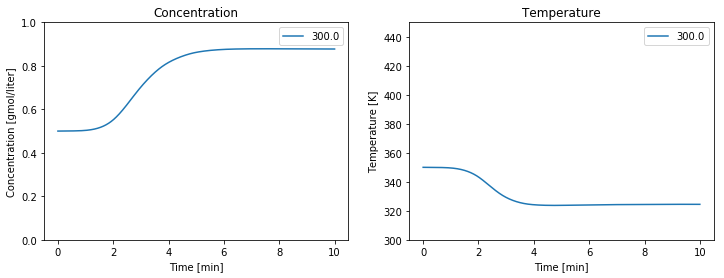

In [3]:
# simulation
IC = [cA0, T0]
t_initial = 0.0
t_final = 10.0
t = np.linspace(t_initial, t_final, 2000)
soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)

# visualization plots concentration and temperature on given axes
def plot_reactor(ax, t, y):
    ax[0].plot(t, y[0], label=str(Tc))
    ax[0].set_xlabel('Time [min]')
    ax[0].set_ylabel('Concentration [gmol/liter]')
    ax[0].set_title('Concentration')
    ax[0].set_ylim(0, 1)
    ax[0].legend()

    ax[1].plot(t, y[1], label=str(Tc))
    ax[1].set_xlabel('Time [min]')
    ax[1].set_ylabel('Temperature [K]');
    ax[1].set_title('Temperature')
    ax[1].set_ylim(300, 450)
    ax[1].legend()
    
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_reactor(ax, soln.t, soln.y);

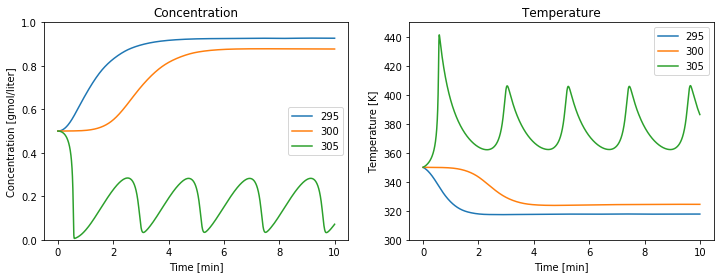

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for Tc in [295, 300, 305]:
    soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
    plot_reactor(ax, soln.t, soln.y)